In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from geojson import Point, Feature, FeatureCollection, dump

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

from scipy.spatial.distance import cdist

%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 100
plt.style.use('ggplot')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

In [2]:
ph = gpd.read_file('data/Philippines_Solar/Barangays_Solar_Data.geojson')
ph.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,NL_NAME_3,VARNAME_3,TYPE_3,ENGTYPE_3,PROVINCE,REGION,GHI_mean,GHI_min,GHI_max,DIF_mean,DIF_min,DIF_max,DNI_mean,DNI_min,DNI_max,GTI_mean,GTI_min,GTI_max,OPTA_mean,OPTA_min,OPTA_max,PVOUT_mean,PVOUT_min,PVOUT_max,TEMP_mean,TEMP_min,TEMP_max,geometry
0,177,PHL,Philippines,1,Abra,16,Manabo,172,San Jose Norte,None,None,Barangay,Village,Abra,Cordillera Administrative Region (CAR),1972.681335,1912.448975,1983.307983,732.932439,715.890015,738.536011,1772.840666,1606.734985,1799.222046,2075.214970,2010.701050,2089.594971,20.000000,20.0,20.0,1623.170833,1609.291992,1631.937012,27.330769,26.400000,27.799999,"MULTIPOLYGON (((120.70043 17.45648, 120.70312 ..."
1,177,PHL,Philippines,1,Abra,16,Manabo,173,San Jose Sur,None,None,Barangay,Village,Abra,Cordillera Administrative Region (CAR),1967.001718,1944.225952,1977.098022,733.630674,724.656006,736.708984,1765.331617,1709.005005,1787.167969,2067.367113,2042.843018,2081.560059,20.000000,20.0,20.0,1617.967421,1606.369019,1624.996948,27.398231,26.799999,27.799999,"MULTIPOLYGON (((120.74783 17.44496, 120.74841 ..."
2,177,PHL,Philippines,1,Abra,16,Manabo,174,San Juan Norte,None,None,Barangay,Village,Abra,Cordillera Administrative Region (CAR),1966.958687,1939.478027,1976.733032,738.551295,729.039001,745.474976,1762.934679,1699.508057,1793.011963,2069.879671,2039.191040,2082.290039,20.008457,20.0,21.0,1622.878809,1611.848022,1640.703003,27.040000,25.600000,27.799999,"MULTIPOLYGON (((120.69788 17.43542, 120.70522 ..."
3,177,PHL,Philippines,1,Abra,16,Manabo,175,San Juan Sur,None,None,Barangay,Village,Abra,Cordillera Administrative Region (CAR),1962.424855,1916.832031,1973.446045,739.567711,725.385986,745.840027,1754.541928,1660.426025,1787.167969,2065.036090,2014.718994,2079.732910,20.008484,20.0,21.0,1619.031331,1604.542969,1632.302002,26.766667,26.100000,27.600000,"MULTIPOLYGON (((120.66516 17.42832, 120.70497 ..."
4,177,PHL,Philippines,1,Abra,16,Manabo,176,San Ramon East,None,None,Barangay,Village,Abra,Cordillera Administrative Region (CAR),1903.905352,1811.640015,1962.123047,751.609724,736.708984,772.504028,1642.933283,1465.748047,1759.774048,1998.892135,1897.473999,2064.758057,20.000000,20.0,20.0,1570.199021,1535.510986,1603.447998,26.408823,24.600000,27.700001,"MULTIPOLYGON (((120.70567 17.42277, 120.76253 ..."


In [3]:
nan_index = ph.index[ph.PVOUT_mean.isnull()].values
# Impute based on Location
for index in nan_index:
    loc_name = ph.loc[index,"NAME_2"]
    imputed_value = ph[ph['NAME_2'] == loc_name].mean().values[0]
    ph.loc[index,'PVOUT_mean'] = imputed_value

In [4]:
pv_out = ph['PVOUT_mean']
pv_out = pv_out.to_numpy()
pv_out = pv_out.reshape(-1,1)
scaler = RobustScaler()
pv_out= scaler.fit_transform(pv_out)

In [5]:
silhouette_scores = []

K = range(2, 20)
 
for k in K:
    # Building and fitting the model    
    gmm = GaussianMixture(n_components = k)
    gmm.fit(pv_out)
    
    pred_clusters = gmm.predict(pv_out)
    silhouette = silhouette_score(pv_out,pred_clusters)
    silhouette_scores.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(k,silhouette))

Silhouette score for number of cluster(s) 2: 0.544639176407825
Silhouette score for number of cluster(s) 3: 0.5108383920442188
Silhouette score for number of cluster(s) 4: 0.5376652732245779
Silhouette score for number of cluster(s) 5: 0.5418429576527106
Silhouette score for number of cluster(s) 6: 0.5285965610721801
Silhouette score for number of cluster(s) 7: 0.5231390871622322
Silhouette score for number of cluster(s) 8: 0.5112593492434556
Silhouette score for number of cluster(s) 9: 0.5255968176039418
Silhouette score for number of cluster(s) 10: 0.5265773587150427
Silhouette score for number of cluster(s) 11: 0.5235936142855102
Silhouette score for number of cluster(s) 12: 0.5235087637925905
Silhouette score for number of cluster(s) 13: 0.5304354944389983
Silhouette score for number of cluster(s) 14: 0.5198821439980313
Silhouette score for number of cluster(s) 15: 0.5257996321790507
Silhouette score for number of cluster(s) 16: 0.5257049797394671
Silhouette score for number of clu

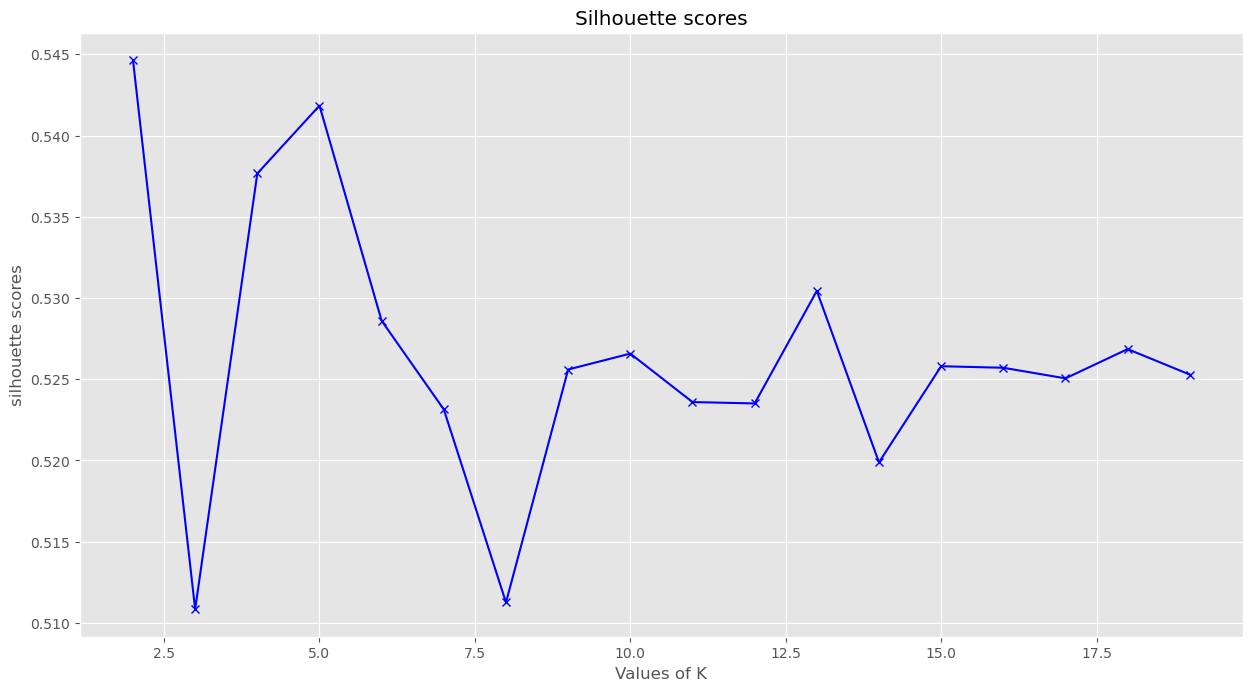

In [7]:
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('silhouette scores')
plt.title('Silhouette scores')
plt.show()

In [9]:
gmm = GaussianMixture(n_components = 5)
gmm.fit(pv_out)

pred_clusters = gmm.predict(pv_out)
silhouette = silhouette_score(pv_out,pred_clusters)
silhouette_scores.append(silhouette)
print("Silhouette score for number of cluster(s) {}: {}".format(5,silhouette))

Silhouette score for number of cluster(s) 5: 0.5418478758957901


In [10]:
set(pred_clusters)

{0, 1, 2, 3, 4}

In [11]:
ph_cluster_gmm = ph.copy()
ph_cluster_gmm['Cluster'] = pred_clusters + 1

Text(0.5, 1.0, 'Barangays Clustered for PVOUT')

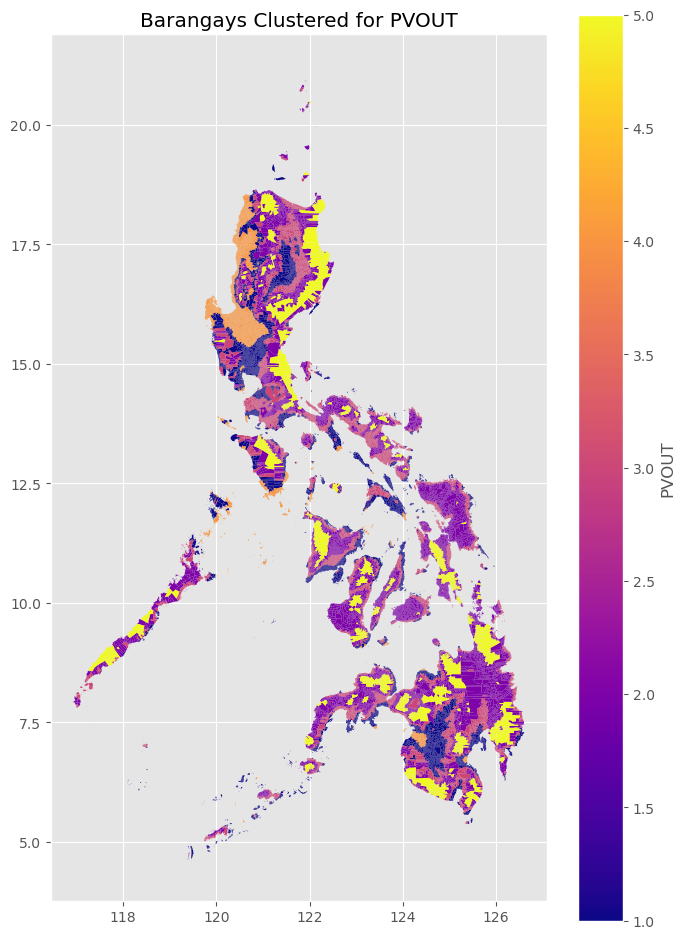

In [12]:
fig, ax = plt.subplots(figsize=(8,12))
ph_cluster_gmm.plot(column= 'Cluster', ax=ax, legend = True, cmap='plasma', 
             legend_kwds = {'label':'PVOUT'})
plt.title('Barangays Clustered for PVOUT')

In [13]:
ph_cluster_gmm.to_file(driver='GeoJSON', filename = "data/results/gmm/ph_clustered.geojson")

In [14]:
ph_cluster_gmm.to_file(driver = 'ESRI Shapefile', filename= "data/results/gmm/ph_clustered.shp")

In [17]:
pv_out_per_cluster_summary = ph_cluster_gmm.groupby('Cluster').agg({'PVOUT_mean': ['mean', 'min', 'max','count']})
pv_out_per_cluster_summary

PVOUT_mean                                 
                mean          min          max  count
Cluster                                              
1        1497.421019  1463.764815  1546.906787   9517
2        1361.113319  1301.477295  1398.323169  13237
3        1430.096339  1398.333444  1463.756015  12480
4        1603.328104  1546.925262  1695.307983   4685
5        1250.242158   177.000000  1301.460268   2014

In [18]:
pv_out_per_cluster_summary.to_csv("data/results/gmm/ph_clusters_summary.csv")